In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [64]:
data_set = pd.read_excel('AirQualityUCI.xlsx', delimiter = ',')

In [65]:
feature_name = ['Date', 'Time', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T','RH', 'AH' ]

In [66]:
data_set = pd.DataFrame(data_set, columns = feature_name)

In [67]:
data_set['Date']

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
5      2004-03-10
6      2004-03-11
7      2004-03-11
8      2004-03-11
9      2004-03-11
10     2004-03-11
11     2004-03-11
12     2004-03-11
13     2004-03-11
14     2004-03-11
15     2004-03-11
16     2004-03-11
17     2004-03-11
18     2004-03-11
19     2004-03-11
20     2004-03-11
21     2004-03-11
22     2004-03-11
23     2004-03-11
24     2004-03-11
25     2004-03-11
26     2004-03-11
27     2004-03-11
28     2004-03-11
29     2004-03-11
          ...    
9327   2005-04-03
9328   2005-04-03
9329   2005-04-03
9330   2005-04-03
9331   2005-04-03
9332   2005-04-03
9333   2005-04-03
9334   2005-04-03
9335   2005-04-03
9336   2005-04-03
9337   2005-04-03
9338   2005-04-03
9339   2005-04-03
9340   2005-04-03
9341   2005-04-03
9342   2005-04-04
9343   2005-04-04
9344   2005-04-04
9345   2005-04-04
9346   2005-04-04
9347   2005-04-04
9348   2005-04-04
9349   2005-04-04
9350   2005-04-04
9351   200

In [68]:
corr = data_set.corr('pearson')


In [69]:
corr

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432
T,0.754806,-0.000008,0.971370,0.668984,-0.138457,0.588061,-0.084084,0.755053,0.503659,1.000000,0.885910,0.980998


In [70]:
abs(corr['AH']).sort_values()

NMHC(GT)         0.012500
NO2(GT)          0.060423
NOx(GT)          0.095841
PT08.S5(O3)      0.519432
PT08.S3(NOx)     0.621576
PT08.S2(NMHC)    0.646535
PT08.S4(NO2)     0.691889
PT08.S1(CO)      0.764866
RH               0.943997
T                0.980998
C6H6(GT)         0.984556
AH               1.000000
Name: AH, dtype: float64

In [79]:
X = data_set['PT08.S4(NO2)']
Y = data_set['AH']

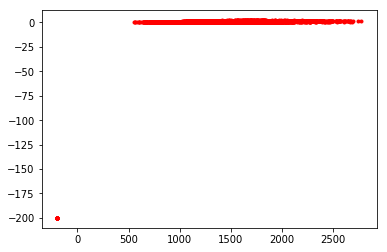

In [80]:
plt.plot(X,Y,'r.')

In [81]:
X = (X-X.min())/(X.max() - X.min())
Y = (Y-Y.min())/(Y.max() - Y.min())

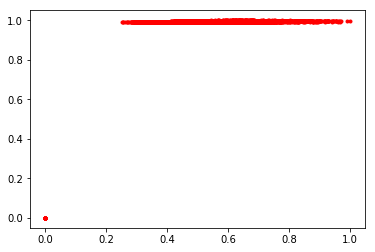

In [82]:
plt.plot(X,Y,'r.')

In [84]:
x = np.array(X)
y = np.array(Y)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25)

In [86]:
def hypo(a,x,b):
    return (1/(1+np.exp(-(a*x + b))))

In [87]:
def error(a,x,b,y):
    e = 0 
    m = len(x)
    
    for i in range(m):
        e += -(y[i]*np.log(hypo(a,x[i],b))) - ((1-y[i]) * np.log(1-hypo(a,x[i],b)))
    
    return (1/m) * e

In [88]:
def step_gradient(a, x, b, y, learning_rate):
    grad_a = 0 
    grad_b = 0
    
    m = len(x)
    
    for i in range(m):
        grad_a += (hypo(a,x[i], b) - y[i]) * (x [i ])
        grad_b += (hypo(a,x[i],b) - y[i]) 
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a,b

In [89]:
def descend(init_a, x,init_b, y, learning_rate, iterations):
    a = init_a
    b = init_b
    
    for i in  range(iterations):
        e = error(a, x, b, y)
        if i%1000 == 0:
            print(f"error: {e}, a:{a}, b:{b}")
        a,b = step_gradient(a,x,b,y,learning_rate)
    return a,b

In [90]:
init_a = 0
init_b = 0
iterations =10000
learning_rate = 0.001

In [91]:
final_a ,  final_b = descend(init_a, x_train, init_b, y_train, learning_rate, iterations)

error: 0.6931471805600279, a:0, b:0


C:\Users\Vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


error: 0.04407578512038245, a:16.65312650070854, b:-2.9238016956547863
error: 0.04407578512038257, a:16.653126509228894, b:-2.923801698390953
error: 0.04407578512038257, a:16.653126509228894, b:-2.923801698390953
error: 0.04407578512038257, a:16.653126509228894, b:-2.923801698390953
error: 0.04407578512038257, a:16.653126509228894, b:-2.923801698390953


KeyboardInterrupt: 

In [94]:
final_a = 16.653126509228894
final_b = -2.923801698390953

In [95]:
def accuracy(a,x,b,y):
    correct = 0
    m = len(x)
    
    for i in range(m):
        pred = hypo(a,x[i],b)
        if pred > 0.5:
            z = 1
        else:
            z = 0
        
        if y[i] == z:
            correct +=1
    print(f"accuracy: {correct/len(y)}")

In [96]:
accuracy(final_a, x_train, final_b, y_train)

accuracy: 0.04033062562348582


In [97]:
accuracy(final_a, x_test, final_b, y_test)

accuracy: 0.035897435897435895


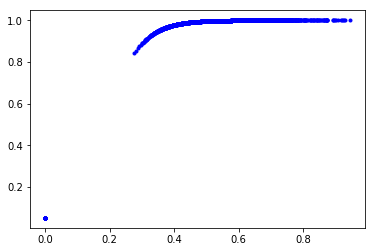

In [99]:
plt.plot(x_test, hypo(final_a, x_test, final_b),'b.')